In [65]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [66]:
weight_g = np.array([
            0,
            9.95,
            19.97, 
            29.93, 
            39.92, 
            49.86, 
            59.88,
            69.86,
            79.84, 
            89.79,
            99.71, 
            109.67
           ])

weight_error = 0.01

start_distance = 21.5 + 0.020
distance_mm = (np.array([
                21.5 + 0.020,
                21.5 - 0.008, 
                21.5 - 0.022, 
                21.5 - 0.035,
                21.5 - 0.046,
                21.5 - 0.060,
                21.5 - 0.072,
                21.5 - 0.089,
                21.5 - 0.100,
                21.5 - 0.119,
                21.5 - 0.136,
                21.5 - 0.148
              ]) - start_distance)/1000

distance_error = [0.01/1000 for i in range(len(distance_mm))]

In [67]:
order = 1
fit_parameters = np.polyfit(weight_g, distance_mm, order)

# Print out the functional form that was fitted so that it is clear to the user how the fit parameters were defined.
# If fitting to a first order polynomial the form is y = A*X + B, for a second order polynomial the form is Y = A*X^2 + B*X + C, etc
if order == 1:
  print("Fit to function y = A*X + B")
if order == 2:
  print("Fit to function y = A*X^2 + B*X + C")

print("Fit Result:")
try:
    # Call the polyfit routine a second time, this time we tell it to return the covariance matrix
    # which contains the uncertainties on the best fit values.
    cov = np.polyfit(weight_g, distance_mm, order, cov=True)[1]
    unc = [np.sqrt(cov[i,i]) for i in range(len(cov))]
    # Print out the best fit parameters and their uncertainties.
    print("A = ",fit_parameters[0],"+-",unc[0])
    print("B = ",fit_parameters[1],"+-",unc[1])
    if order == 2:
      print("C = ",fit_parameters[2],"+-",unc[2])

# If the polyfit routine encountered an error while trying to fit the data, return the fit parameters and a statement
# indicating that there was a problem with the fit.
except ValueError:
    print("A = ",fit_parameters[0])
    print("B = ",fit_parameters[1])
    if order == 2:
      print("C = ",fit_parameters[2])
    print("Not enough data points to find fit uncertainties")


Fit to function y = A*X + B
Fit Result:
A =  -1.4531618185474506e-06 +- 3.430844222757857e-08
B =  -8.188943492059889e-06 +- 2.2222393792578727e-06


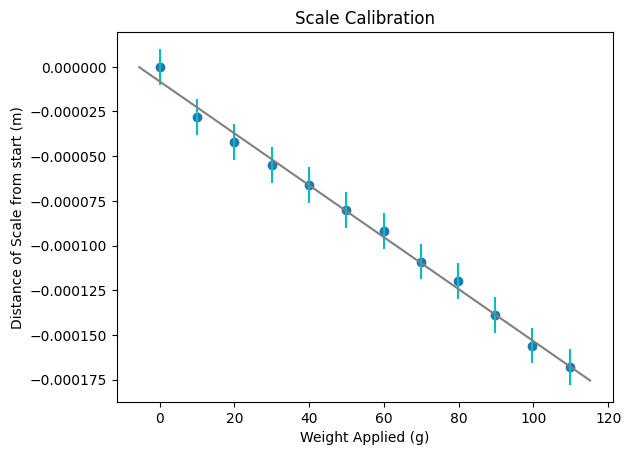

In [68]:
padding = (max(weight_g) - min(weight_g))/20
Fit_line_x = np.linspace(min(weight_g)-padding, max(weight_g)+padding)

# Change the plot title and axes labels as appropriate for the data you are plotting.
plt.title('Scale Calibration')
plt.xlabel('Weight Applied (g)')
plt.ylabel('Distance of Scale from start (m)')

# The command "errorbar" creates an xy plot with errorbars on the y-axis.
# The "fmt" parameter is used to make the points for the data red (r) and use a dot (.) for the marker.
plt.errorbar(weight_g, distance_mm, distance_error, fmt='c ')

# Plot the best fit line.  Note how we use the best fit parameters returned by the polyfit routine to 
# calculate the y-axis values for each point along the x-axis.  
# For whatever reason when using the "plot" command the color and line type are set with out using "fmt =".
# Just use the specifier for the line color (k) for black and line type (-) for a solit line.
if order == 1:
  plt.plot(Fit_line_x, fit_parameters[1]+Fit_line_x*fit_parameters[0], color="grey")
if order == 2:
  plt.plot(Fit_line_x, fit_parameters[2]+Fit_line_x*fit_parameters[1]+Fit_line_x*Fit_line_x*fit_parameters[0], color="grey")

plt.scatter(weight_g, distance_mm)

plt.show()

In [69]:
calibration_m = -1.4531618185474506e-06
calibration_b = -8.188943492059889e-06

plate_mass = 115.3

plate_distance_m = calibration_m * plate_mass + calibration_b

voltage = 1484
area = math.pi * (12.7/(2*100))**2
epsilon0 = 8.85418782*(10**-12)

distance_m = np.array([5.96, 4.96, 3.96, 2.96, 1.96, 0.96, 1.46, 2.46])/1000

#distance_m = [d/1000 for d in [5.96, 4.96, 3.96, 2.96, 1.96, 1.46, 2.46]]
distance_squared_m2 = distance_m ** -2

measured_mass_g = np.array([0.31, 0.49, 0.8, 1.42, 3.65, 22.3, 7.31, 2.35])/1000

#measured_mass_kg = [m/1000 for m in [0.31, 0.49, 0.8, 1.42, 3.65, 7.31, 2.35]]
measured_force_N = measured_mass_kg * 9.80665
measured_force_uncertainties = [0.01 for i in range(len(measured_force_N))]

expected_force_N = (area * epsilon0 * (voltage**2))/(2 * (distance_m **2))

In [77]:

corrected_distance_m = []

for i in range(len(distance_m)):
    mass = measured_mass_g[i]
    
    correction = plate_distance_m - (calibration_m * mass) + calibration_b
    
    print (correction, end=", ")
    
    corrected_distance_m.append(distance_m[i] + correction)
    
corrected_distance_m = np.array(corrected_distance_m)
corrected_distance_m2 = corrected_distance_m **-2
print (distance_m)
print (corrected_distance_m)

-0.00018392699418247707, -0.00018392673261334973, -0.00018392628213318598, -0.00018392538117285848, -0.00018392214062200313, -0.0001838950391540872, -0.00018391682204974724, -0.00018392402973236723, [0.00596 0.00496 0.00396 0.00296 0.00196 0.00096 0.00146 0.00246]
[0.00577607 0.00477607 0.00377607 0.00277607 0.00177608 0.0007761
 0.00127608 0.00227608]


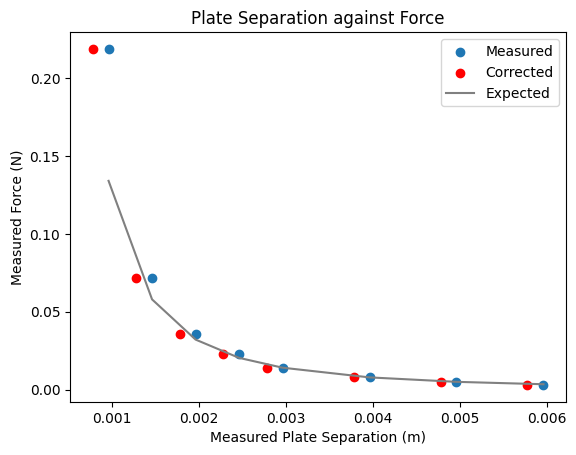

In [78]:
plt.title("Plate Separation against Force")
plt.xlabel("Measured Plate Separation (m)")
plt.ylabel("Measured Force (N)")

plt.scatter(distance_m, measured_force_N, label="Measured")
plt.scatter(corrected_distance_m, measured_force_N, label="Corrected", color="red")

order = np.argsort(distance_m)
plt.plot(np.array(distance_m)[order], np.array(expected_force_N)[order], color="grey", label="Expected")

plt.legend()

plt.show()

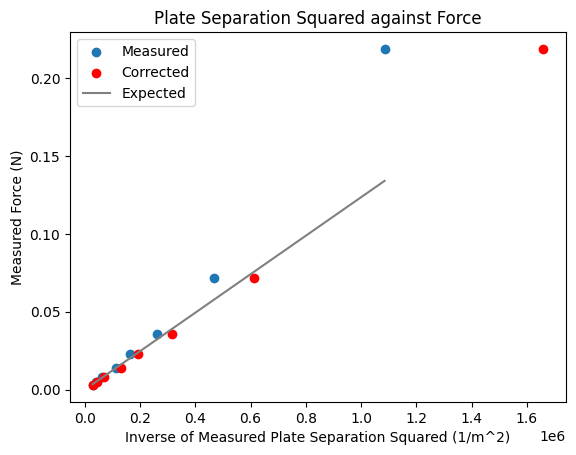

In [79]:
plt.title("Plate Separation Squared against Force")
plt.xlabel("Inverse of Measured Plate Separation Squared (1/m^2)")
plt.ylabel("Measured Force (N)")

plt.scatter(distance_squared_m2, measured_force_N, label="Measured")
plt.scatter(corrected_distance_m2, measured_force_N, label="Corrected", color="red")

order = np.argsort(distance_m)
plt.plot(np.array(distance_squared_m2)[order], np.array(expected_force_N)[order], color="grey", label="Expected")

plt.legend()

plt.show()